# Customer Segmentation

* Customer segmentation is the process of dividing customers into groups based on common characteristics such as demographics, behavior, preferences, or needs. The purpose of segmentation is to better understand customers and tailor marketing strategies or offerings to meet their specific requirements. By categorizing customers into segments, businesses can improve customer satisfaction, increase sales, and optimize resource allocation.

# Data
The data contains 2,205 observations and 39 columns. 


* AcceptedCmp1-  1 if customer accepted the offer in the 1st campaign, 0 otherwise

* AcceptedCmp2-  1 if customer accepted the offer in the 2nd campaign, 0 otherwise

* AcceptedCmp3-  1 if customer accepted the offer in the 3rd campaign, 0 otherwise

* AcceptedCmp4-  1 if customer accepted the offer in the 4th campaign, 0 otherwise

* AcceptedCmp5-  1 if customer accepted the offer in the 5th campaign, 0 otherwise

* AcceptedCmpOverall-	overall number of accepted campaigns	

* Response- 1 if customer accepted the offer in the last campaign, 0 otherwise	

* Complain-	1 if customer complained in the last 2 years	

* DtCustomer- date of customer’s enrolment with the company	

* Customer_Day-	number of days since registration as a customer	

* education_2n Cycle-	customer has secondary education	

* education_Basic-	customer has basic education	

* education_Graduation-	Customer has a bachelor degree	

* education_Master-	Customer has a masters degree	

* education_PhD	Customer has a PhD	
* marital_Divorced-	1 if customer is divorced, 0 otherwise.	
* marital_Married-	1 if customer is married, 0 otherwise.	
* marital_Single-	1 if customer is single, 0 otherwise.	
* marital_Together-1 if customer is in relationship, 0 otherwise.- * 
* marital_Widow-	1 if customer is a widow / widower, 0 otherwise	
* Kidhome-	number of small children in customer’s household	
* Teenhome-	number of teenagers in customer’s household	
* Income-	customer’s yearly household income	
* MntFishProducts-	amount spent on fish products in the last 2 years	
* MntMeatProducts-	amount spent on meat products in the last 2 years	
* MntFruits-	amount spent on fruits products in the last 2 years	
* MntSweetProducts-	amount spent on sweet products in the last 2 years	
* MntWines-	amount spent on wine products in the last 2 years	
* MntGoldProds-	amount spent on gold products in the last 2 years	
* NumDealsPurchases-	number of purchases made with discount	
* NumCatalogPurchases-	number of purchases made using catalogue	
* NumStorePurchases-	number of purchases made directly in stores	
* NumWebPurchases-	number of purchases made through company’s web site	
* NumWebVisitsMonth-	number of visits to company’s web site in the last month	
* Recency-	number of days since the last purchase	
* Z_CostContact		
* Z_Revenue		
* Age-	Age of customer	This column was added from the list of actual columns
* MntTotal-	Total amount spent on all the products	This column was added from the list of actual columns
* MntRegularProds-

# Importing Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from scipy.stats import skew
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

# Loading Dataset

In [151]:
data=pd.read_csv('ifood_df.csv')


In [152]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [153]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# Data Exploration and cleaning

In [154]:
data.isnull().sum() #there are no null values

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [155]:
data.info() # All Dtypes are in correct format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [156]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

# Outlier Detection

In [157]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [158]:
# Focusing on MntTotal Checking the distribution and finding the outlier by boxplot

<Axes: >

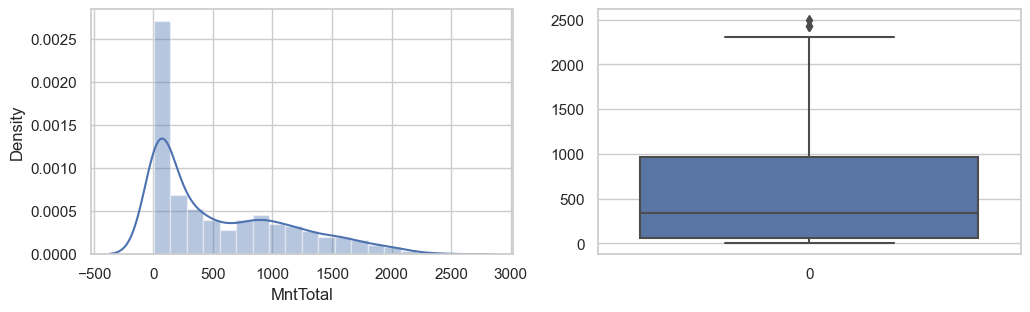

In [159]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.distplot(data['MntTotal'])
plt.subplot(2,2,2)
sns.boxplot(data['MntTotal'])

In [160]:
# Setting upper and lower limit for outlier removal

In [161]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_range) | (data['MntTotal'] > upper_range)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [162]:
print("lower_MntTotal:", lower_range)
print("upper_MntTotal:", upper_range)

lower_MntTotal: -1306.0
upper_MntTotal: 2326.0


In [163]:
#removing outliers

In [164]:
data = data[(data['MntTotal'] > lower_range) & (data['MntTotal'] < upper_range)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


# Calculating key metrices
* Average purchase and frequency of purchase

In [165]:
# Calculate Total Amount Spent on Purchases (MntTotal)
data['MntTotal'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'MntRegularProds']].sum(axis=1)

# Calculate Total Number of Purchases (sum of all types of purchases)
total_purchases = data['NumDealsPurchases'].sum() + data['NumWebPurchases'].sum() + data['NumCatalogPurchases'].sum() + data['NumStorePurchases'].sum()

# Calculate Average Purchase Value (AvgPurchaseValue)
total_amount_spent = data['MntTotal'].sum()
avg_purchase_value = total_amount_spent / total_purchases

print("Average Purchase Value (AvgPurchaseValue):", avg_purchase_value)

Average Purchase Value (AvgPurchaseValue): 75.30122394164148


In [166]:
# Calculate Total Number of Purchases (sum of all types of purchases)
total_purchases = data['NumDealsPurchases'].sum() + data['NumWebPurchases'].sum() + data['NumCatalogPurchases'].sum() + data['NumStorePurchases'].sum()

# Assuming the total number of customers is the length of the DataFrame (assuming each row represents a unique customer)
total_customers = len(data)

# Calculate Purchase Frequency (average number of purchases per customer)
purchase_frequency = total_purchases / total_customers

print("Purchase Frequency (PurchaseFrequency):", purchase_frequency)


Purchase Frequency (PurchaseFrequency): 14.878746594005449


# Visulization and Correlation for better analysis and understanding

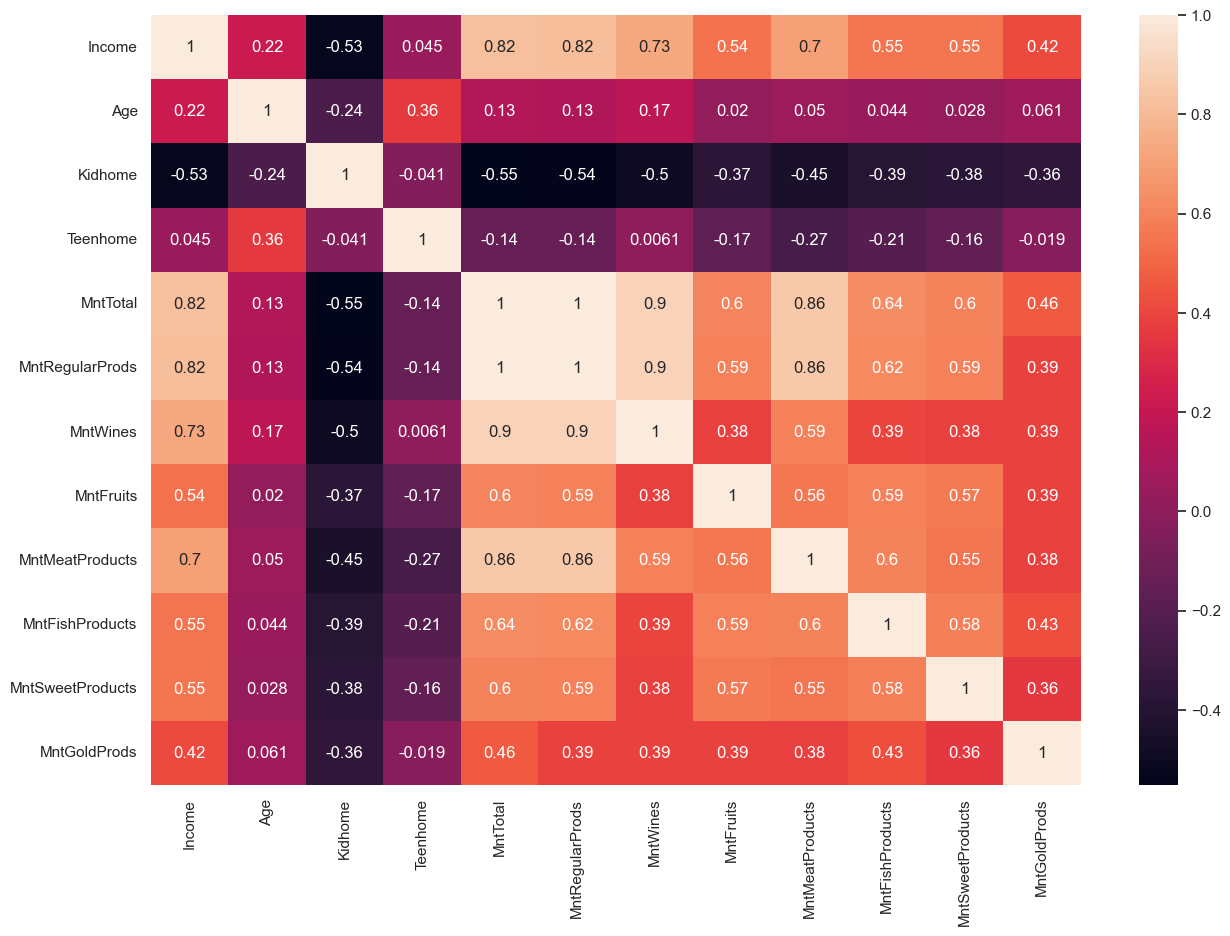

In [167]:
Corr=['Income','Age','Kidhome','Teenhome','MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

plt.figure(figsize=(15,10))
sns.heatmap(data[Corr].corr(), annot=True)
plt.show()

In [168]:
# From the heatmap above we can see Income is positively correlated with Mnttotal, MntRegularProds, Mntwines, and MntMeatProducts
# On the other hand Income is negatively correlated with Kidhome, Age, Teenhome

# Boxplot and histogram for income and age also checking the skewness and kurotsis

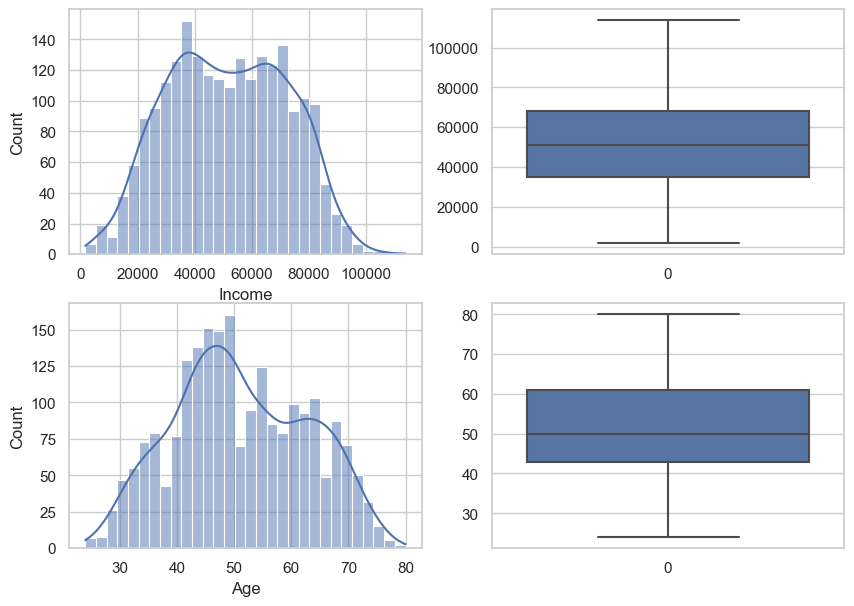

Income Skewness: 0.012251050882147308
Income kurtosis: -0.8462133289546081
--------------------------------------------------
Age Skewness: 0.09122721532989637
Age kurtosis: -0.7961248628270488


In [169]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.histplot(data['Income'], bins=30, kde=True)
plt.subplot(2,2,2)
sns.boxplot(data['Income'])
plt.subplot(2,2,3)
sns.histplot(data['Age'], bins=30, kde=True)
plt.subplot(2,2,4)
sns.boxplot(data['Age'])
plt.show()

print('Income Skewness:', data['Income'].skew())
print('Income kurtosis:', data['Income'].kurt())
print('-'*50)
print('Age Skewness:', data['Age'].skew())
print('Age kurtosis:', data['Age'].kurt())

In [170]:
# As we can see Income and Age have no outliers and skewness in close to zero,
# Also  kurtosis of the  dataset is very less having lighter tails so we can assume them normally distributed

# Point-Biserial Correlation 
* The Point-Biserial Correlation is a special case of the Pearson Correlation and is used when you want to measure the relationship between a continuous variable and binary variable one that has two values(0,1).

In [171]:
from scipy.stats import pointbiserialr
binary_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']

for col in data[binary_marital]:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')  

0.0053: Point-Biserial Correlation for marital_Divorced with p-value 0.8041
-0.0188: Point-Biserial Correlation for marital_Married with p-value 0.3767
0.0011: Point-Biserial Correlation for marital_Single with p-value 0.9571
0.0008: Point-Biserial Correlation for marital_Together with p-value 0.9708
0.0370: Point-Biserial Correlation for marital_Widow with p-value 0.0826


In [172]:
#There is no strong Point-Biserial correlation between MntTotal and different marital statuses.

In [173]:
binary_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

for col in data[binary_education]:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')   

-0.0593: Point-Biserial Correlation for education_2n Cycle with p-value 0.0054
-0.1389: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0159: Point-Biserial Correlation for education_Graduation with p-value 0.4551
0.0004: Point-Biserial Correlation for education_Master with p-value 0.9842
0.0737: Point-Biserial Correlation for education_PhD with p-value 0.0005


In [174]:
#There is no strong Point-Biserial correlation between MntTotal and various education levels.

# Feature Engineering

* From Point-Biserial Correlation we found that there no strong correlation between MntTotal and various other binary variable so for modelling process some feature is done

In [175]:
# There are different marital status so we are making new column 'Marital' were we are assigning the values Divorced, Married, Single, Together, Widow

In [176]:
def marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(marital_status, axis=1)

In [177]:
# Now we are assigning the values 1 to the (Together, Married) and 0 to (Single, Divorced, Widow)

In [178]:
def relationship_status(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['relationship'] = data.apply(relationship_status, axis=1)
data.head()   

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,3058,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,42,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,1468,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,96,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,814,392,0,Married,1


In [179]:
# Countplot and pie chart for identifying marital_status count

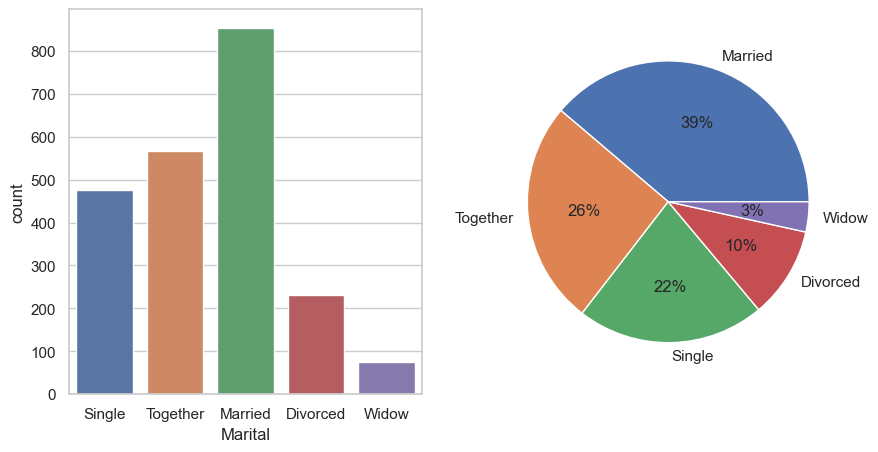

In [180]:
labels=['Married', 'Together', 'Single', 'Divorced', 'Widow']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.countplot(x='Marital', data=data)
plt.subplot(1,2,2)
plt.pie(data['Marital'].value_counts(), autopct='%.0f%%', labels=labels)
plt.show()

In [181]:
#barplot of Marital_status vs MntTotal

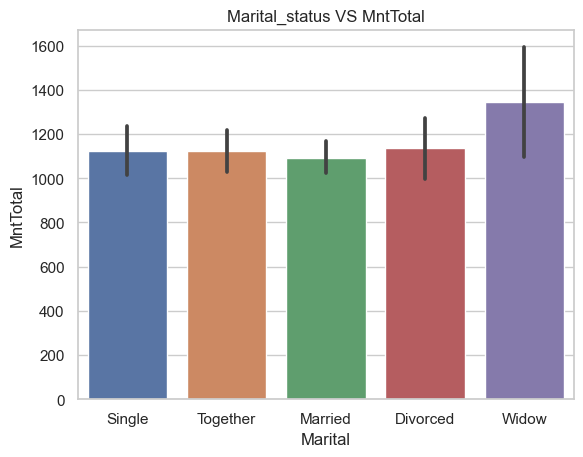

In [182]:
sns.barplot(x='Marital', y='MntTotal', data=data)
plt.title('Marital_status VS MntTotal')
plt.show()

# K-Means Clustering

* K means clustering is a distance based unsupervised clustering algorithm where data points closed to each other are grouped in a given number of clusters/groups

# Standardization 

* Standardizing data using Standard Scaler for the better and outlier free anlaysis 

In [183]:
from sklearn.cluster import KMeans

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[['Income', 'MntTotal', 'relationship']] = scaler.fit_transform(data[['Income', 'MntTotal', 'relationship']])
data_scaled[['Income', 'MntTotal', 'relationship']].describe()

,Income,MntTotal,relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


# Principal Component Analysis (PCA)
* PCA is a technique of dimensionality reduction. By maximizing the variance PCA takes the original features (dimensions) and create new features.

In [185]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[['Income', 'MntTotal', 'relationship']])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

# Using Elbow method and Silhouette score analysis to find (K)
* The elbow method is used to determine the optimal number of clusters in k-means clustering.

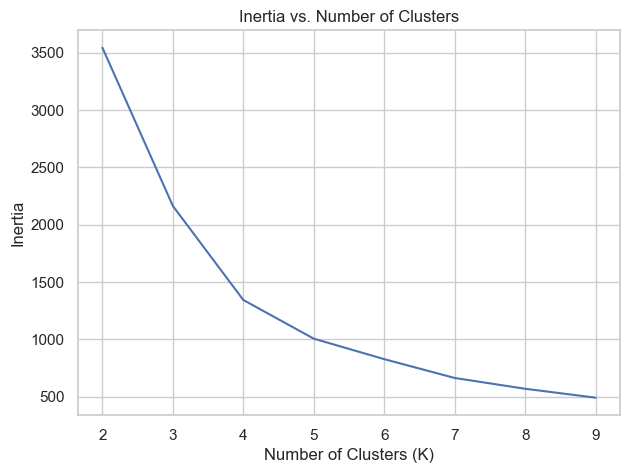

In [186]:
X = data_scaled[['Income', 'MntTotal', 'relationship']]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list)
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [187]:
# After plotting the graph elbow method is suggestion 4 or 5 clusters, to get the perfect value lets use silhouette method

# Silhouette score analysis
* Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

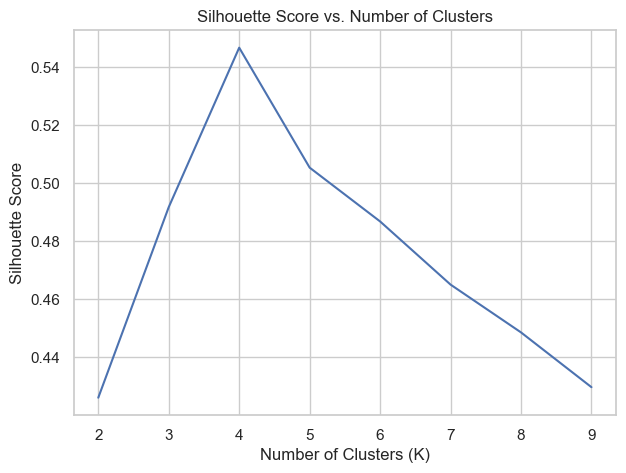

In [188]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [189]:
#The highest silhouette score is for 4 clusters.

In [190]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[['Income', 'MntTotal', 'relationship']])
data_scaled['Cluster'] = model.predict(data_scaled[['Income', 'MntTotal', 'relationship']])

In [191]:
data_scaled

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,relationship,pc1,pc2,Cluster
0,0.317669,0,0,58,635,88,546,172,88,88,...,0,0,1.693815,1441,0,Single,-1.348874,1.455789,1.319249,2
1,-0.252786,1,1,38,11,1,6,2,1,6,...,0,0,-0.942701,15,0,Single,-1.348874,-0.811291,1.366361,1
2,0.969430,0,0,26,426,49,127,111,21,42,...,0,0,0.303874,692,0,Together,0.741359,0.881451,-0.766825,0
3,-1.205543,1,0,26,11,4,20,10,3,5,...,0,0,-0.895496,43,0,Together,0.741359,-1.503762,-0.702395,3
4,0.325166,1,0,94,173,43,118,46,27,15,...,0,1,-0.267837,392,0,Married,0.741359,0.021901,-0.744923,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.466884,0,1,46,709,43,182,42,118,247,...,0,0,0.933281,847,0,Married,0.741359,0.971194,-0.763734,0
2201,0.601880,2,1,56,406,0,30,0,0,8,...,0,1,-0.217135,428,1,Together,0.741359,0.253333,-0.751795,0
2202,0.261707,0,0,91,908,48,217,32,12,24,...,0,0,1.148329,1193,1,Divorced,-1.348874,1.030606,1.327604,2
2203,0.854894,0,1,8,428,30,214,80,30,61,...,1,0,0.387795,721,0,Together,0.741359,0.859822,-0.765346,0


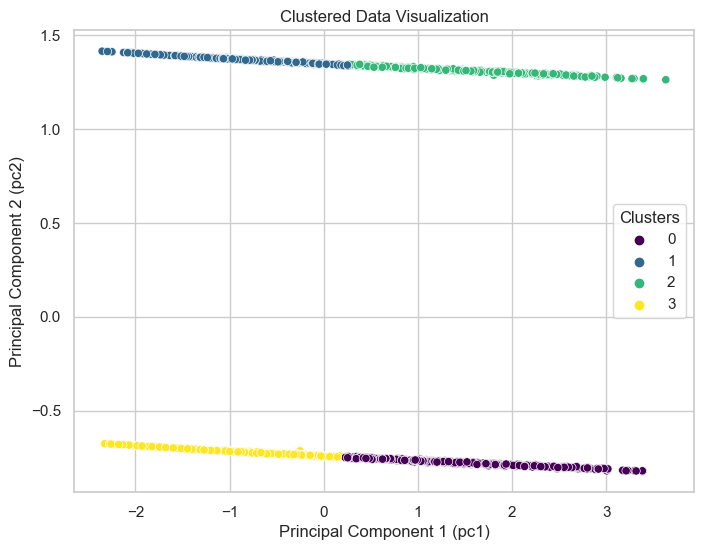

In [192]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')
plt.show()

# Mean of Income MntTotal, Relationship and  different product types w.r.t cluster

In [193]:
data['Cluster'] = data_scaled.Cluster
mean=data.groupby('Cluster')[['Income', 'MntTotal', 'relationship']].mean().reset_index()
mean

,Cluster,Income,MntTotal,relationship
0,0,71818.929329,2294.745583,1.0
1,1,37332.339956,301.523179,0.0
2,2,71946.155488,2319.225610,0.0
3,3,37892.819883,316.926316,1.0


# Visualization w.r.t Cluster for better understanding

In [194]:
#Income, Mnttotal, relationship mean w.r.t Cluster plot

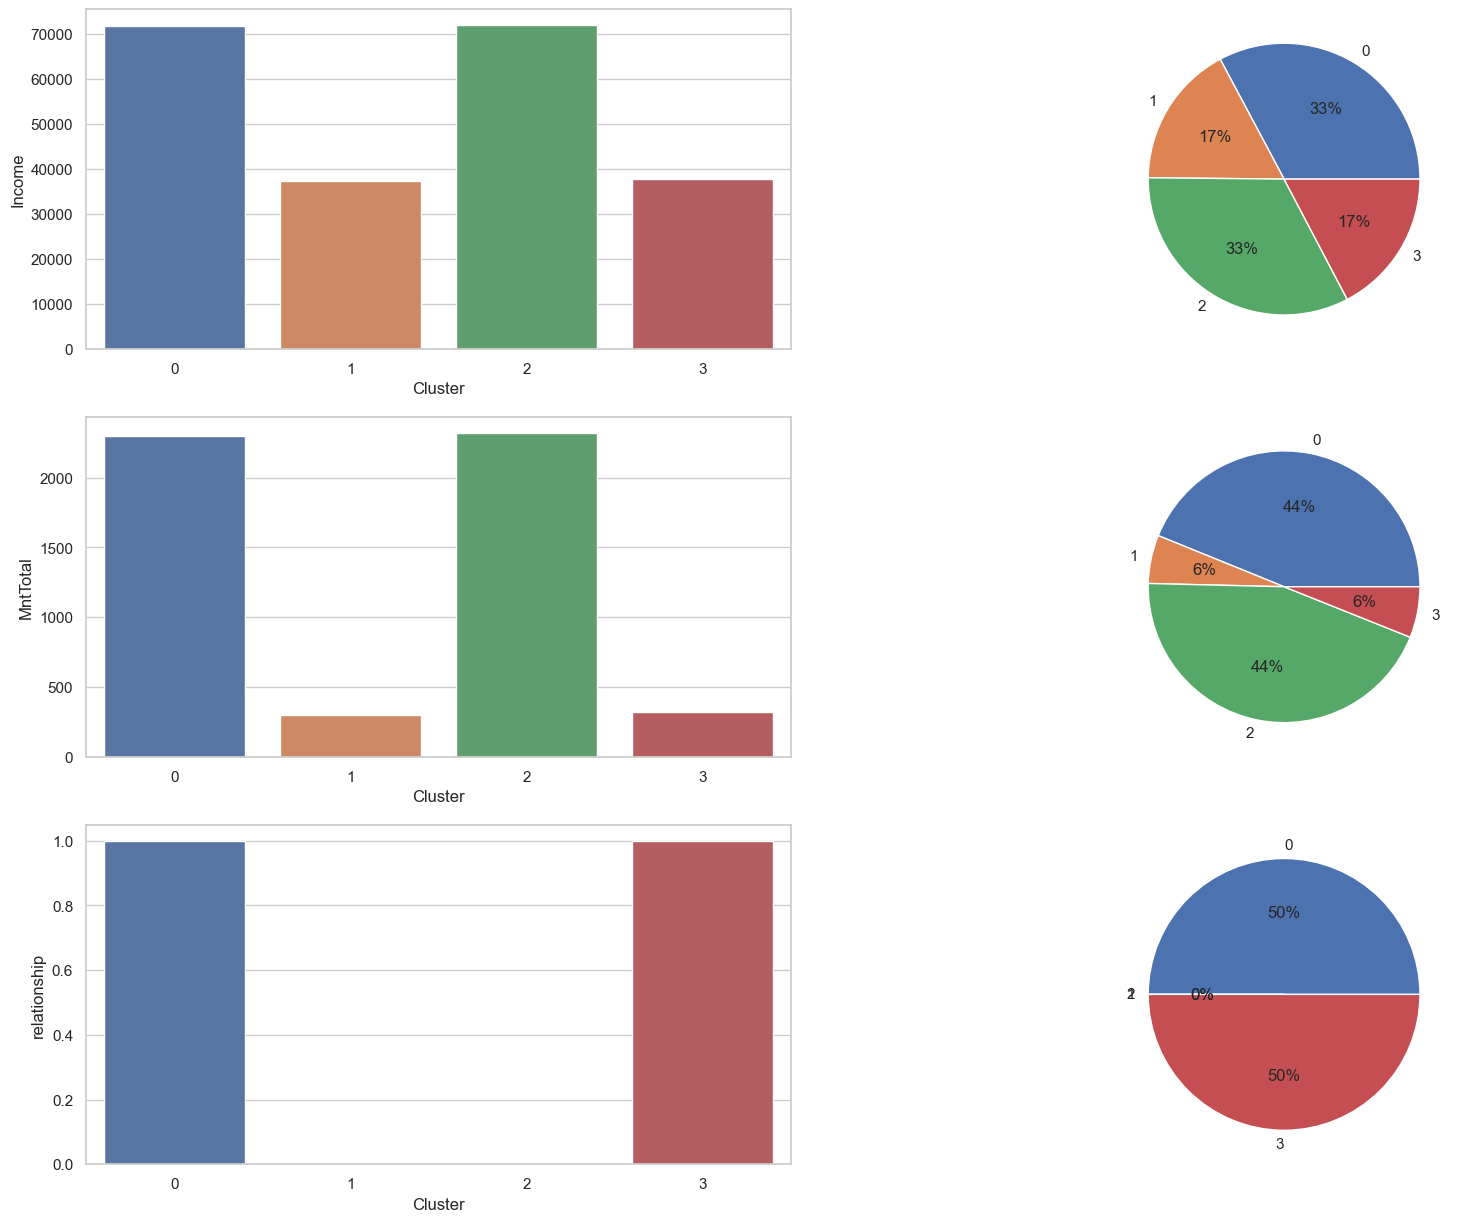

In [195]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.barplot(x='Cluster', y='Income', data= mean)
plt.subplot(3,2,2)
plt.pie(mean['Income'], autopct='%.0f%%', labels=mean['Cluster'])
plt.subplot(3,2,3)
sns.barplot(x='Cluster', y='MntTotal', data= mean)
plt.subplot(3,2,4)
plt.pie(mean['MntTotal'], autopct='%.0f%%', labels=mean['Cluster'])
plt.subplot(3,2,5)
sns.barplot(x='Cluster', y='relationship', data= mean)
plt.subplot(3,2,6)
plt.pie(mean['relationship'], autopct='%.0f%%', labels=mean['Cluster'])
plt.show()

In [196]:
#Mnttotal count w.r.t Cluster plot

In [197]:
count = data.groupby('Cluster')[ 'MntTotal'].count().reset_index()
count

,Cluster,MntTotal
0,0,566
1,1,453
2,2,328
3,3,855


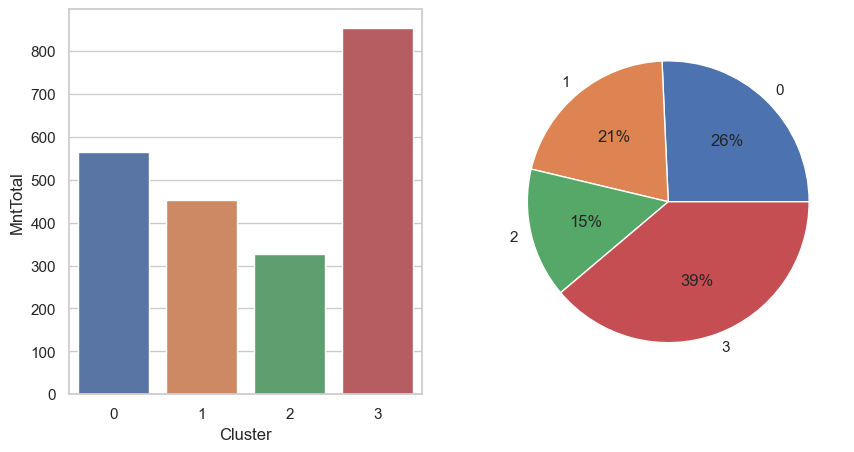

In [198]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='Cluster', y='MntTotal', data= count)
plt.subplot(1,2,2)
plt.pie(count['MntTotal'], autopct='%.0f%%', labels=count['Cluster'])
plt.show()

In [199]:
#Plotting product Consumption w.r.t Cluster

In [200]:
consumption= data.groupby('Cluster')[[ 'MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().reset_index()
consumption

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,2294.745583,1076.279152,623.261484,52.489399,341.326855,75.577739,54.717314,71.093640
1,1,301.523179,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,2319.225610,1085.332317,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488
3,3,316.926316,133.962573,92.046784,7.640936,39.438596,11.423392,7.913450,24.500585


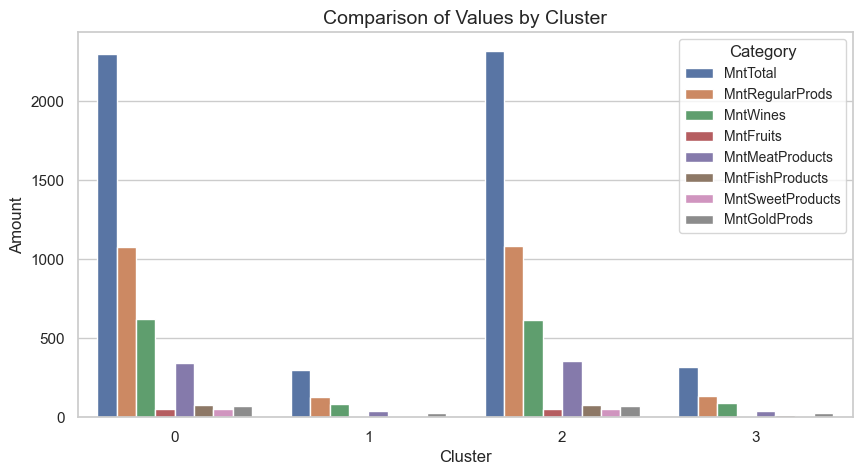

In [201]:
# Reshape DataFrame to long format for plotting
consumption_long = pd.melt(consumption, id_vars=['Cluster'], var_name='Category', value_name='Amount')

# Plotting the grouped bar chart using sns.barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='Cluster', y='Amount', hue='Category', data=consumption_long)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Comparison of Values by Cluster', fontsize=14)
plt.legend(title='Category', fontsize=10)
plt.show()

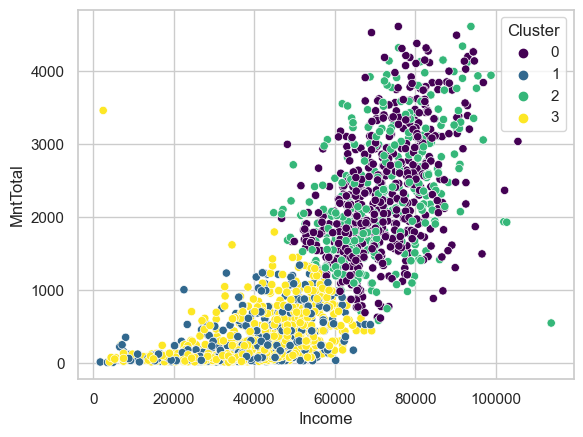

In [202]:
sns.scatterplot(x='Income', y='MntTotal', data=data, hue='Cluster', palette='viridis')
plt.show()

# Conclusion

* With the help of barplot we can see that there are highest number of married and lowest number of Widow
* Widow are highest MntTotal
* he Elbow Method and Silhouette Analysis suggested optimal number of clusters as 4 (k=4)
* With the help of grouped barchart we found that MntRegularProds and MntWines are the most bought items.
* With the help of Scatterplot we can see that Expenditure increases with Income.


# Cluster Characterstics

1. Cluster 0:
* Have 26% of customers.
* Have second highest income (71818.929329).
* They are in relationship.
2. Cluster 1:
* Have 21% of customers.
* Have lowest income (37332.339956).
* They are single.
3. Cluster 2:
* Have income of (71946.155488).
* Have 15% of customers.
* They are single.
4. Cluster 3:
* Have income of (37892.819883).
* Have 39% of customers.
* They are in relationship.


# Marketing stratergy for each clusters

1. Cluster 0:
* Target Audience: Affluent couples.
* Strategies:
* Premium Bundled Offers: Create exclusive packages combining high-end products or services that cater to couples.
* Personalized Relationship Benefits: Highlight perks like couple discounts, romantic getaways, or family-oriented experiences.
* VIP Membership Programs: Offer loyalty programs with special privileges for long-term customers.

2. Cluster 1:
* Target Audience: Budget-conscious singles.
* Strategies:
* Affordable Solutions: Focus on budget-friendly offerings and promotions.
* Singles' Deals and Discounts: Provide exclusive deals that cater to the needs and preferences of single individuals.
* Convenience and Accessibility: Emphasize easy access and convenience in purchasing and usage.

3. Cluster 2:
* Target Audience: Moderate-income singles.
* Strategies:
* Value for Money: Highlight the value proposition of products/services that are affordable yet of good quality.
* Aspirational Marketing: Position offerings as attainable luxuries for singles with disposable income.
* Customized Recommendations: Provide personalized recommendations based on individual preferences and lifestyle.

4. Cluster 3:
* Target Audience: Lower-income couples.
* Strategies:
* Affordable Family Solutions: Offer practical and economical products/services that meet family needs.
* Bulk or Family Discounts: Provide discounts for purchasing in larger quantities or catering to family sizes.
* Community Engagement: Build community initiatives that resonate with family values and affordability.

# Thank You